# Collect Data for Reddit Data Viz Battle - Lake Mendota

In [1]:
# Main Imports
import re
import requests
import pandas as pd
import numpy as np
from scipy import stats

import json
import time
import string
import warnings
from datetime import timedelta

#Scraping
from bs4 import BeautifulSoup


## Scrape Website for Lake Data

In [2]:
url = 'http://www.aos.wisc.edu/~sco/lakes/Mendota-ice.html' # Webiste to Scrape

In [3]:
# Check that pull was a success
res = requests.get(url)
res.status_code

200

In [4]:
soup = BeautifulSoup(res.text, 'lxml') # Turn into soup 

In [5]:
data = soup.find_all('p') # Extract paragraph element

In [6]:
# The last column was messed up so just decided to manually add them (bad coding)
list_year =['2000-01','2001-02','"','2002-03','2003-04','2004-05','2005-06',
'2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14',
'2014-15','2015-16','2016-17','2017-18']

list_close = ['13 Dec','2 Jan','4 Mar','4 Jan','7 Jan','25 Dec','19 Dec','20 Jan','26 Dec',
'16 Dec','29 Dec','15 Dec','14 Jan','14 Jan','16 Dec','2 Jan','11 Jan', '1 Jan','27 Dec']

list_open = ['7 Apr','12 Jan','15 Mar','3 Apr','27 Mar','5 Apr','24 Mar','27 Mar','10 Apr',
'23 Mar','26 Mar','3 Apr','11 Mar','11 Apr','12 Apr','3 Apr','13 Mar','7 Mar','31 Mar']

list_days = [115,'-',21,89,80,101,95,66,106,97,87,109,57,87,117,91,62,65,94]

In [7]:
# Extract text from paragraph element
scrape = [data[i].text for i in range(0,len(data))]

In [8]:
# Break up text data into lists based on line breaks
# This way we can iterate over each list after each item is is
lists = [x.split('\n') for x in scrape]

In [9]:
# Create multiple dataframes for each column of data that we will eventually concatenate together
lake_df = pd.DataFrame(columns=[lists[i][0] for i in range(2,6)])
lake_df2 = pd.DataFrame(columns=[lists[i][0] for i in range(2,6)])
lake_df3 = pd.DataFrame(columns=[lists[i][0] for i in range(2,6)])
lake_df4 = pd.DataFrame(columns=[lists[i][0] for i in range(2,6)])
lake_df5 = pd.DataFrame(columns=[lists[i][0] for i in range(2,6)])
lake_df6 = pd.DataFrame(columns=[lists[i][0] for i in range(2,6)])
lake_df7 = pd.DataFrame(columns=[lists[i][0] for i in range(2,6)])


In [10]:
# Group 1
lake_df['WINTER'] = lists[10]
lake_df['CLOSED'] = lists[11]
lake_df['OPENED'] = lists[12]
lake_df['DAYS'] = lists[13]

In [11]:
# Group 2
lake_df2['WINTER'] = lists[15]
lake_df2['CLOSED'] = lists[16]
lake_df2['OPENED'] = lists[17]
lake_df2['DAYS'] = lists[18]

In [12]:
#Group 3
lake_df3['WINTER'] = lists[27]
lake_df3['CLOSED'] = lists[28]
lake_df3['OPENED'] = lists[29]
lake_df3['DAYS'] = lists[30]

In [13]:
# Group 4
lake_df4['WINTER'] = lists[32]
lake_df4['CLOSED'] = lists[33]
lake_df4['OPENED'] = lists[34]
lake_df4['DAYS'] = lists[35]

In [14]:
# Group 5
lake_df5['WINTER'] = lists[44]
lake_df5['CLOSED'] = lists[45]
lake_df5['OPENED'] = lists[46]
lake_df5['DAYS'] = lists[47]

In [15]:
# Group 6
lake_df6['WINTER'] = lists[49]
lake_df6['CLOSED'] = lists[50]
lake_df6['OPENED'] = lists[51]
lake_df6['DAYS'] = lists[52]

In [16]:
# Group 7
lake_df7['WINTER'] = list_year
lake_df7['CLOSED'] = list_close
lake_df7['OPENED'] = list_open
lake_df7['DAYS'] = list_days

In [17]:
# Concatenate!
lake_df = lake_df.append([lake_df2,lake_df3,lake_df4,lake_df5,lake_df6,lake_df7],ignore_index=True)

In [18]:
# Replaces [Winter] value when it is blank
for i in [index for index in lake_df.loc[lake_df['WINTER'] == '"',:].index]:
    lake_df.iloc[i]['WINTER'] = lake_df.iloc[i-1]['WINTER']

In [19]:
# Drop first three rows with incomplete measurements
lake_df = lake_df[3:]
lake_df.reset_index(inplace=True, drop=True)

In [20]:
# Check dataframe structure
lake_df.head()

,WINTER,CLOSED,OPENED,DAYS
0,1855-56,18 Dec,14 Apr,118
1,1856-57,6 Dec,6 May,151
2,1857-58,25 Nov,26 Mar,121
3,1858-59,8 Dec,14 Mar,96
4,1859-60,7 Dec,26 Mar,110


In [21]:
# Create new column for close data adding the year
close_date =[(lake_df.iloc[row].WINTER[:4] + ' ' + lake_df.iloc[row].CLOSED)
             if
             lake_df.CLOSED.values[row][-3:] == 'Dec' or lake_df.CLOSED.values[row][-3:] == 'Nov'
             else
             (lake_df.iloc[row].WINTER[:2] + lake_df.iloc[row].WINTER[5:7]+ ' ' + lake_df.iloc[row].CLOSED)
             if 
             lake_df.iloc[row].WINTER[5:7] != '00'
             else
             (lake_df.iloc[row+1].WINTER[:2] + lake_df.iloc[row].WINTER[5:7]+ ' ' + lake_df.iloc[row].CLOSED)
             for row in range(0,len(lake_df))]
    

In [22]:
# Create new column for open data adding the year
open_date = [(lake_df.iloc[row].WINTER[:2] + lake_df.iloc[row].WINTER[5:7]+ ' ' + lake_df.iloc[row].OPENED)
             if 
             lake_df.iloc[row].WINTER[5:7] != '00'
             else
             (lake_df.iloc[row+1].WINTER[:2] + lake_df.iloc[row].WINTER[5:7]+ ' ' + lake_df.iloc[row].OPENED)
             for row in range(0,len(lake_df))]


In [23]:
# Add to dataframe
lake_df['Close_Date'] = close_date
lake_df['Open_Date'] = open_date

In [24]:
# Covert to Datatime 
lake_df['Close_Date'] = pd.to_datetime(lake_df.Close_Date)
lake_df['Open_Date'] = pd.to_datetime(lake_df.Open_Date)

In [25]:
# Create total days closed betweeon dates
lake_df['Days_Frozen'] = lake_df['Open_Date'] - lake_df['Close_Date']

In [26]:
# Correct gaps over a year 
for row in lake_df.loc[lake_df.Days_Frozen > '200 days',:].index:
    lake_df.Days_Frozen.iloc[row] = lake_df.Days_Frozen.iloc[row] - timedelta(days=365)

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
# Why did we do this? There are years wehere the time closed wasn't continuous
# This not splits those into their appropriate gaps
lake_df.Days_Frozen = lake_df.Days_Frozen.dt.days

## EDA

In [28]:
import chartify

Loading BokehJS ...

In [29]:
lake_df.head()

,WINTER,CLOSED,OPENED,DAYS,Close_Date,Open_Date,Days_Frozen
0,1855-56,18 Dec,14 Apr,118,1855-12-18,1856-04-14,118
1,1856-57,6 Dec,6 May,151,1856-12-06,1857-05-06,151
2,1857-58,25 Nov,26 Mar,121,1857-11-25,1858-03-26,121
3,1858-59,8 Dec,14 Mar,96,1858-12-08,1859-03-14,96
4,1859-60,7 Dec,26 Mar,110,1859-12-07,1860-03-26,110


In [30]:
# Assign one year to each observation
lake_df['Year'] = [year[:4] for year in lake_df['WINTER'].values]

In [31]:
# Make into grouped data by year
chart_data = lake_df.groupby('Year').sum().reset_index()

In [32]:
# Scatter plot
ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
ch.plot.scatter(data_frame=chart_data,
        x_column='Year',
        y_column='Days_Frozen')
ch.set_title("Lake Mendota")
ch.set_subtitle("Number of Days Closed For Each Year")
ch.show()

In [33]:
# Histogram
ch = chartify.Chart(blank_labels=True, y_axis_type='density')
ch.plot.histogram(data_frame=chart_data,
        values_column='Days_Frozen',)
ch.set_title("Lake Mendota")
ch.set_subtitle("Histogram of Days Closed")
ch.show()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [35]:
# Reorganize dataframe to be used to create grouping of data looking back over the last 30 years \\
# Starting from current year
rolling_df = pd.DataFrame(columns=['Year','thirty_years'])
for x in range(30, len(chart_data)):
    for value in list(chart_data[x-30:x].Days_Frozen):
        rolling_df.loc[len(rolling_df)] = [chart_data.iloc[x].Year[:4],value]


In [36]:
# Covert Data Type
rolling_df['Year'] = pd.to_numeric(rolling_df.Year)
rolling_df['Days Frozen'] = pd.to_numeric(rolling_df.thirty_years)

In [37]:
# Export for use in Tableau
rolling_df.to_csv('data/reddit_lake_boxplot.csv')

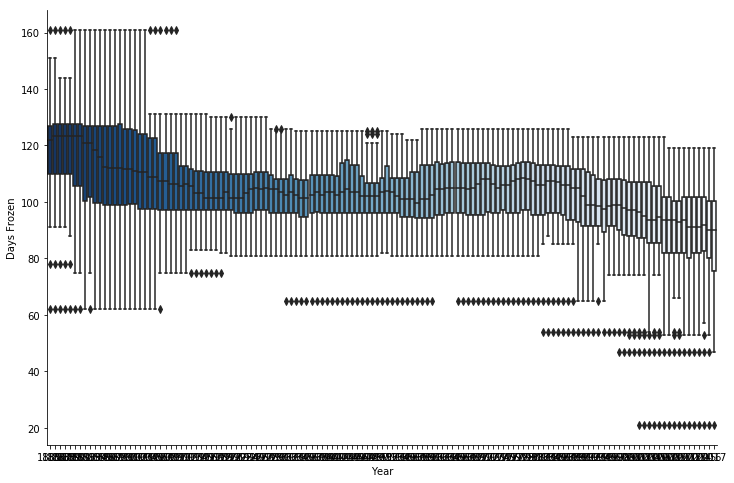

In [38]:
# Test new dataset is in format that is wanted (boxplot per year)
plt.figure(figsize=(12,8))
ax =sns.boxplot(data=rolling_df, y='Days Frozen', x='Year',palette='Blues_r',color='blue')
sns.despine()



## ARIMA

In [45]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARMA

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split




In [41]:
diff_by_2 = chart_data['Days_Frozen'].diff(2).dropna()
rolling_avg = rolling_df.groupby('Year').mean()['Days Frozen']

In [139]:
rolling_avg.to_csv('data/reddit_lake_rolling_avg.csv')

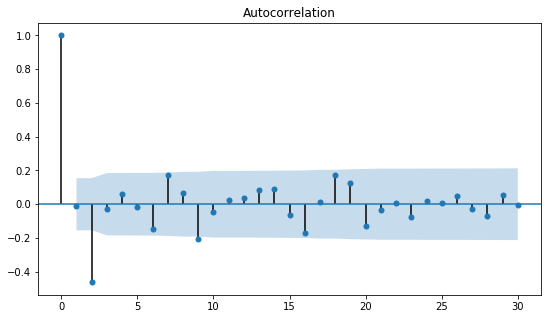

In [42]:
fig, ax = plt.subplots(figsize = (9, 5))
plot_acf(diff_by_2, lags = 30, ax = ax)
plt.show();

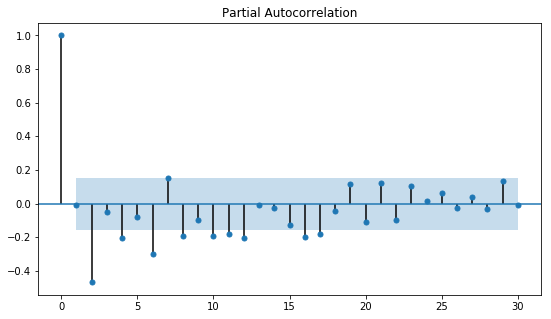

In [43]:
fig, ax = plt.subplots(figsize = (9, 5))
plot_pacf(diff_by_2, lags = 30, ax=ax)
plt.show();

In [46]:
# Check stationarity using dickey-fuller 
dickey_fuller_test = adfuller(diff_by_2)
dickey_fuller_test_ma = adfuller(rolling_avg)

In [47]:
# Fuunction to isolate results for dickey-fuller test output
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index = ['Test Statistic','p-value'])
    return dfoutput

In [48]:
# Dickey-Fuller on Diff of 2
interpret_dftest(adfuller(chart_data.Days_Frozen.diff(2).dropna()))

Test Statistic   -7.330477e+00
p-value           1.131322e-10
dtype: float64

In [49]:
#  Dickey-Fuller on rolling average
interpret_dftest(adfuller(rolling_avg))

Test Statistic   -0.358490
p-value           0.916802
dtype: float64

In [53]:
# Find 70/30 split for train test data
len(rolling_avg[:])*0.7

93.1

In [54]:
train_X = rolling_avg[:93]
len(train_X)

93

In [55]:
test_X = rolling_avg[93:]
len(test_X)

40

In [56]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the fut

Test RMSE: 18.211


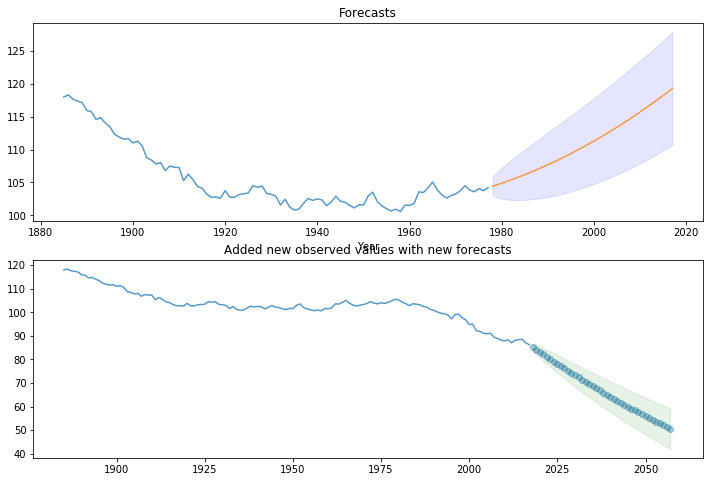

In [57]:
modl = auto_arima(train_X, start_p=1, start_q=1, start_P=1, start_Q=1,
                  max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=False,
                  stepwise=True, suppress_warnings=True, D=None, max_D=10,
                  error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test_X.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test_X, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train_X.shape[0] + preds.shape[0])
x_years = x_axis + pd.to_numeric(rolling_df['Year'][0])

fig, ax = plt.subplots(2,1,figsize = (12, 8))
ax[0].plot(x_years[x_axis[:train_X.shape[0]]], train_X, alpha=0.75)
ax[0].plot(x_years[x_axis[train_X.shape[0]:]], preds, alpha=0.75)  # Forecasts
#ax[0].scatter(x_years[x_axis[train_X.shape[0]:]], test_X, alpha=0.4, marker='x')  # Test data
ax[0].fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
ax[0].set_title("Forecasts")
ax[0].set_xlabel("Year")

# Now add the actual samples to the model and create NEW forecasts
modl.add_new_observations(test_X)
new_preds, new_conf_int = modl.predict(n_periods=len(test_X), return_conf_int=True)
new_x_axis = np.arange(rolling_avg.shape[0] + new_preds.shape[0]) + pd.to_numeric(rolling_df['Year'][0])

ax[1].plot(new_x_axis[:rolling_avg.shape[0]], rolling_avg, alpha=0.75)
ax[1].scatter(new_x_axis[rolling_avg.shape[0]:], new_preds, alpha=0.4, marker='o')
ax[1].fill_between(new_x_axis[-new_preds.shape[0]:],
                     new_conf_int[:, 0],
                     new_conf_int[:, 1],
                     alpha=0.1, color='g')
ax[1].set_title("Added new observed values with new forecasts")
plt.show()

In [219]:
lower_limit = [interval[0] for interval in new_conf_int]
upper_limit = [interval[1] for interval in new_conf_int]

In [234]:
forcast_df = pd.DataFrame(data=rolling_avg)

In [235]:
forcast_df = forcast_df.append(pd.DataFrame(list(zip(new_preds,lower_limit,upper_limit)),index=new_x_axis[133:],columns=['Forecast','Lower','Upper']),sort=True)


In [237]:
forcast_df.to_csv('data/reddit_lake_forecast_ARIMA.csv')

## MCMC Plots

In [58]:
import pymc3 as pm

Couldn't import dot_parser, loading of dot files will not be possible.


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [59]:
frozen_data = chart_data.Days_Frozen.values[31:]
years = pd.to_numeric(chart_data.Year.values[31:])


In [60]:
mu1 = rolling_df.loc[rolling_df['Year'] == 1885,'Days Frozen'].values.mean()
std1 = rolling_df.loc[rolling_df['Year'] == 1885,'Days Frozen'].values.std()

In [61]:
mu2 = rolling_df.loc[rolling_df['Year'] == 2017,'Days Frozen'].values.mean()
std2 = rolling_df.loc[rolling_df['Year'] == 2017,'Days Frozen'].values.std()

In [62]:
with pm.Model() as frozen_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=1895)

    # Priors for pre- and post-switch rates number of closed datas
    early_rate = pm.Normal('early_rate',mu=mu1,sd=std1)
    late_rate = pm.Normal('late_rate',mu=mu2,sd=std2)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    frozen_solid = pm.Poisson('frozen', rate, observed=frozen_data)

In [63]:
with frozen_model:
    trace = pm.sample(10000, tune=3000)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]
Sampling 2 chains: 100%|██████████| 26000/26000 [00:20<00:00, 1267.30draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


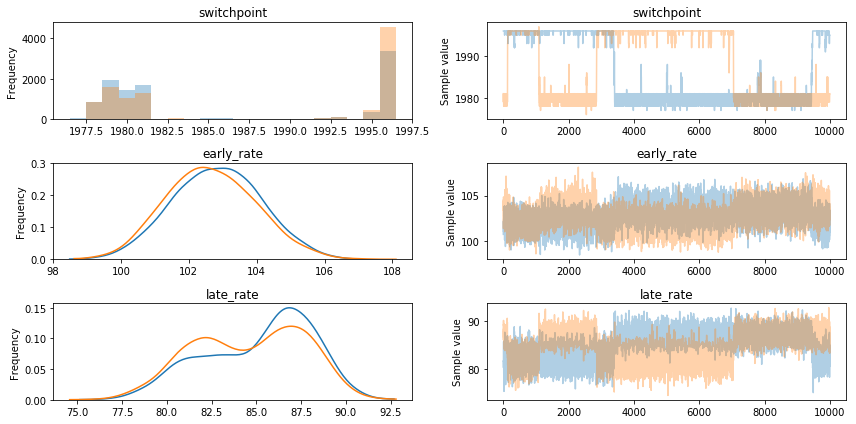

In [64]:
pm.traceplot(trace);

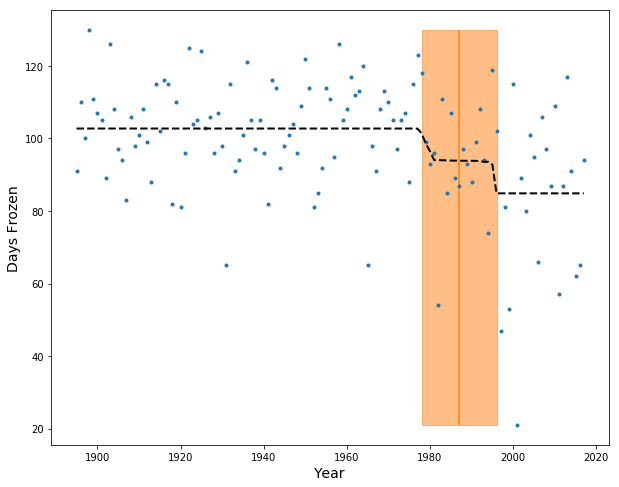

In [65]:
plt.figure(figsize=(10, 8))
plt.plot(years, frozen_data, '.')
plt.ylabel("Days Frozen", fontsize=14)
plt.xlabel("Year", fontsize=14)

plt.vlines(trace['switchpoint'].mean(), frozen_data.min(), frozen_data.max(), color='C1')
average_frozen = np.zeros_like(frozen_data, dtype='float')
for i, year in enumerate(years):
    idx = year < trace['switchpoint']
    average_frozen[i] = (trace['early_rate'][idx].sum() + trace['late_rate'][~idx].sum()) / (len(trace) * trace.nchains)

sp_hpd = pm.hpd(trace['switchpoint'])
plt.fill_betweenx(y=[frozen_data.min(), frozen_data.max()],
                  x1=sp_hpd[0], x2=sp_hpd[1], alpha=0.5, color='C1');
plt.plot(years, average_frozen,  'k--', lw=2);

In [213]:
trace['switchpoint'].mean()

1987.0249

In [212]:
mcmc_df = pd.DataFrame(average_frozen,index=years,columns=['Average Rate'])
mcmc_df['Days Closed'] = frozen_data
mcmc_df.to_csv('data/reddit_lake_mcmc.csv')

## Linear Regression

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


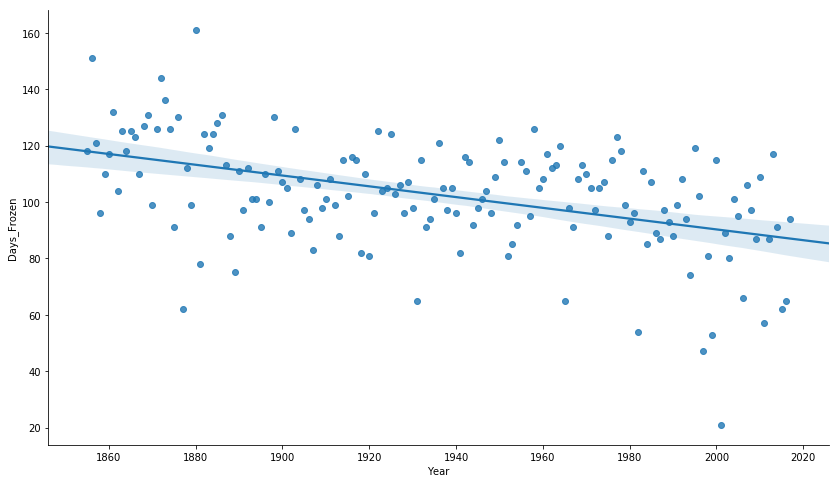

In [315]:
# Let's look at a basic linear regression to see what it shows
plt.figure(figsize=(14,8))
x = pd.to_numeric(chart_data['Year'])
y = chart_data['Days_Frozen']
sns.regplot(x,y)
sns.despine()

In [913]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [920]:
print(f'Y = {slope: .2f}X + {intercept: .2f}')

Y = -0.19X +  472.27


In [921]:
- intercept / slope

2472.6445369739

In [214]:
# Test output for year 2045
-0.19*2045 +472.27

83.71999999999997

In [928]:
chart_data.to_csv('data/reddit_lake_scatterplot.csv')

In [67]:
import statsmodels.formula.api as smf

In [85]:
chart_data['Year'] = pd.to_numeric(chart_data.Year)

In [86]:
reg = smf.ols('Days_Frozen ~ Year', data=chart_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Days_Frozen   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     43.66
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           5.43e-10
Time:                        12:55:23   Log-Likelihood:                -695.55
No. Observations:                 163   AIC:                             1395.
Df Residuals:                     161   BIC:                             1401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    472.2651     55.976      8.437      0.000     361.722     582.808
Year          -0.1910      0.029     -6.608      0.000      -0.248      -0.134
==============================================================================
Omnibus:                       19.715   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.661
Skew:                          -0.715   Prob(JB):                     1.62e-06
Kurtosis:                       4.371   Cond. No.                     7.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# Make Predicitions and Residuals
pred_val = reg.fittedvalues.copy()
true_val = chart_data['Days_Frozen'].values.copy()
residual = true_val - pred_val

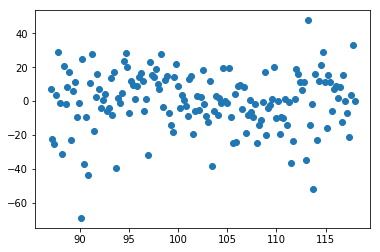

In [105]:
fig, ax = plt.subplots(figsize=(6,4))
_ = ax.scatter(pred_val, residual)

In [106]:
residuals_df = pd.DataFrame(columns=['residuals','predicted values'])

In [111]:
residuals_df['residuals'] = residual
residuals_df['predicted values'] = pred_val
residuals_df['Year'] = chart_data['Year']

In [112]:
residuals_df.to_csv('data/reddit_lake_residuals.csv')

In [110]:
# Test for normality on residuals
from scipy.stats import normaltest
normaltest(residual)

NormaltestResult(statistic=19.715176182553826, pvalue=5.234845723529543e-05)

In [94]:
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan

In [91]:
sms.linear_harvey_collier(reg)

Ttest_1sampResult(statistic=0.8942974986437542, pvalue=0.37251444913804643)

In [95]:
_, pval, __, f_pval = het_breuschpagan(residual, chart_data[['Year']])
pval, f_pval

(nan, 8.100790963957926e-11)

In [96]:
import scipy as sp

0.9653019661083793

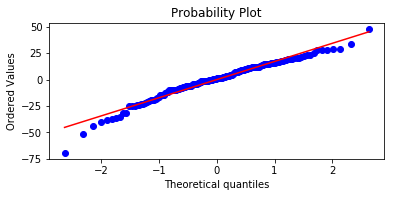

In [97]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

## Frequency by date

In [969]:
# Dates
df_closed = pd.to_datetime(lake_df.CLOSED,format=('%d %b')).sort_values().value_counts()

## Volatility Test

In [975]:
import scipy as sp

In [990]:
with pm.Model() as volatility_model:
    mu = pm.Normal('Mean_days_closed', mu = lake_df.Days_Frozen.mean(), sd=0.01, testval=lake_df.Days_Frozen.mean())
    sigma = pm.HalfCauchy('volatility',beta=1, testval= lake_df.Days_Frozen.std())
    closed = pm.Normal('closed',mu=mu, sd=sigma,observed=lake_df.Days_Frozen)
    thirty_vol = pm.Deterministic('thirty_volatility', closed.distribution.variance**0.5*np.sqrt(30))
    sharpe = pm.Deterministic('sharpe', closed.distribution.mean / closed.distribution.variance**0.5*np.sqrt(30))


    start = pm.find_MAP(fmin=sp.optimize.fmin_powell)
    step = pm.NUTS(scaling=start)
    vol_trace = pm.sample(500,step,start=start)
    

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -795.18:   1%|          | 37/5000 [00:00<00:06, 717.35it/s] 


Optimization terminated successfully.
         Current function value: 795.184741
         Iterations: 1
         Function evaluations: 37


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [volatility, Mean_days_closed]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1116.45draws/s]


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.

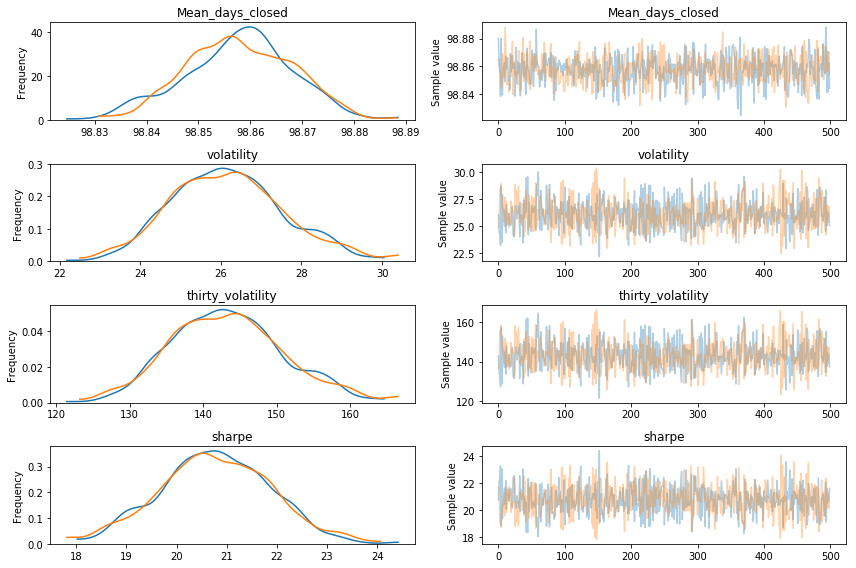

In [991]:
pm.traceplot(vol_trace);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c39cdc160>,
      dtype=object)

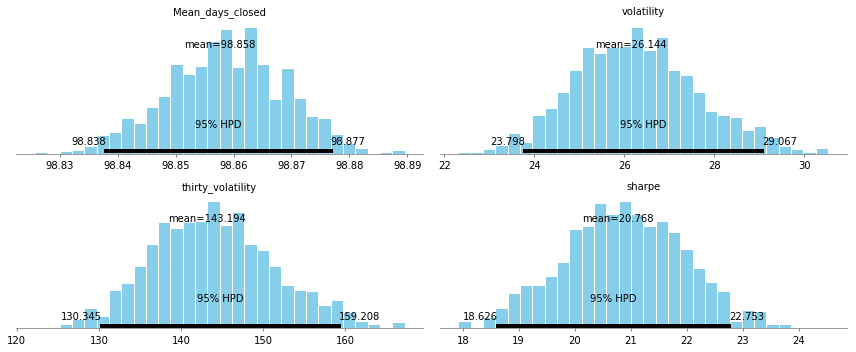

In [994]:
pm.plot_posterior(vol_trace)